### Library

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Data Loading

In [138]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [139]:
data = pd.read_csv('./data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

### Data readme

In [140]:
print('Data Obs : {}' .format(len(data)))
print('Data Columns : {} features' .format(len(data.columns)))
print('Data Columns : {}' .format(list(data.columns)))

Data Obs : 506
Data Columns : 14 features
Data Columns : ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


### Data Head

In [128]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


![screensh](./figure/feature.png)

### Find a Missing Value

In [129]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Describe

In [130]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### data Correlation

In [131]:
corr = data.corr().round(2)

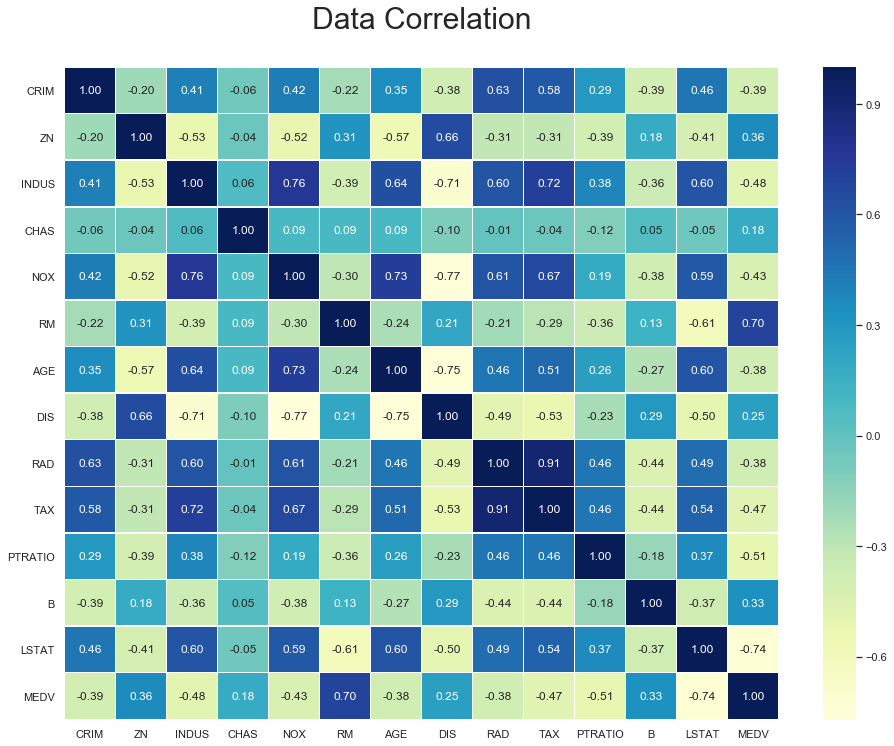

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16,12))
plt.title("Data Correlation", fontsize=30, position=(0.5, 1.0+0.05))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5, ax=ax, cmap='YlGnBu')
plt.show()

시각화를 통해

1) MEDV와 LSTAT(저소득층 주민 비율), RM(집 안의 방의 개수)의 변수와의 상관관계가 높음을 알 수 있었다.

3) RAD와 TAX의 상관관계가 가장 높으며, CHAS(찰스 강의 위치 여부)는 어느 변수던 상관관계가 미비함을 알 수 있었다.


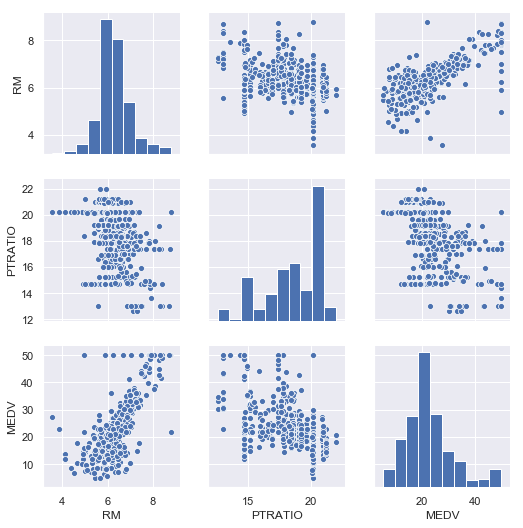

In [133]:
# 상관계수가 -0.5 이하이거나 0.5 이상인 경우

sns.pairplot(data[['RM','PTRATIO','MEDV']])
            

plt.show()

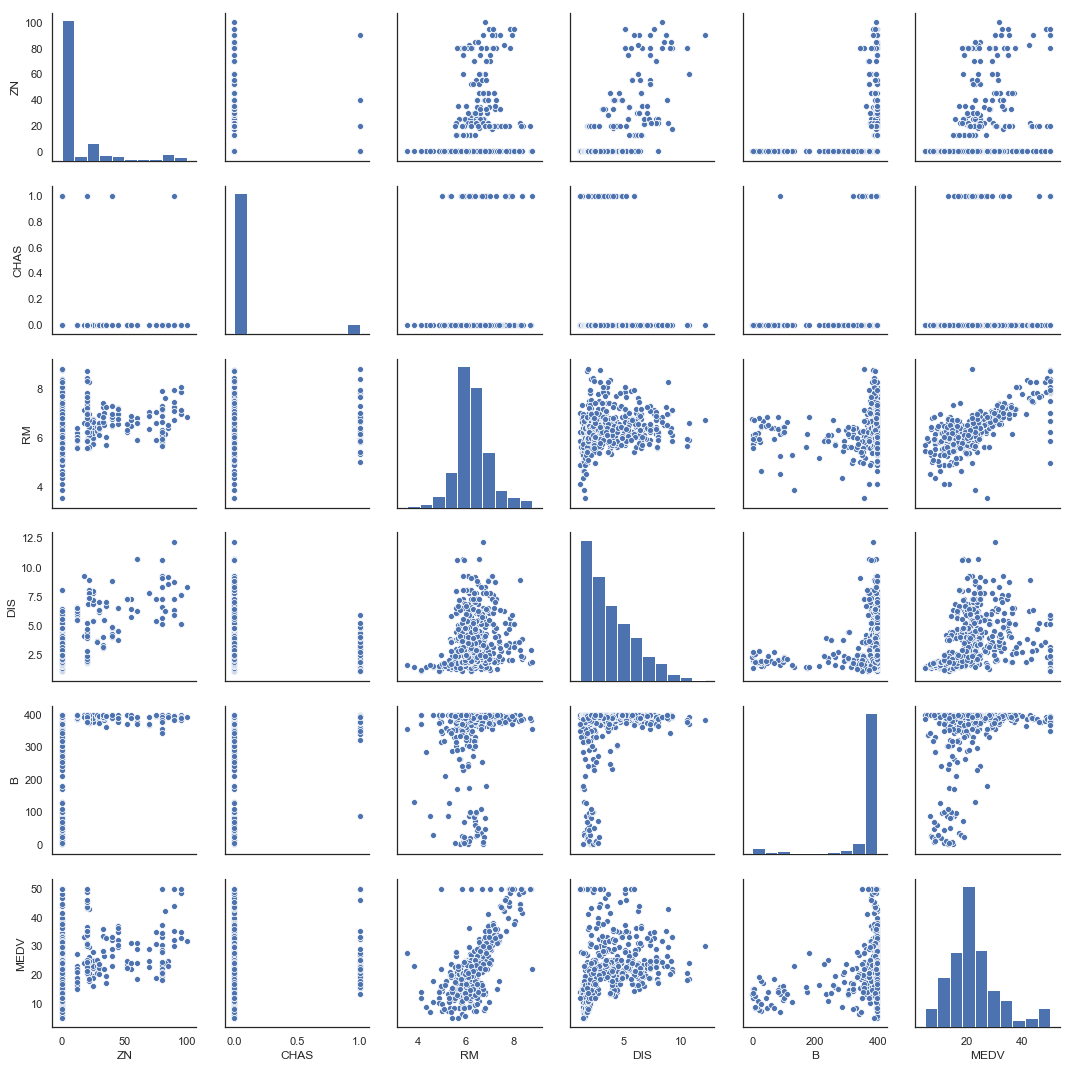

In [141]:
# MEDV와 양의 상관계수를 띄는 경우

sns.pairplot(data[['ZN','CHAS','RM','DIS','B','MEDV']])
            

plt.show()

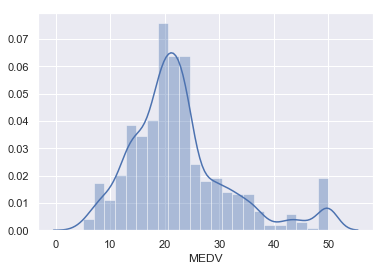

In [135]:
sns.distplot(data['MEDV'])
plt.show()

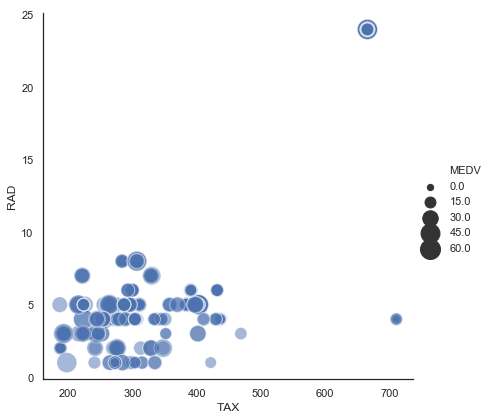

In [136]:
# RAD와 TAX의 산점도

sns.set(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="TAX", y="RAD", size="MEDV",
            sizes=(40, 400), alpha=.5, palette="cmap",
            height=6, data=data)
plt.show()

In [137]:
# 이상치를 제거한 RAD와 TAX의 상관 계수가 0.91에서 0.24까지 하락함을 알 수 있음.

data[data['TAX'] < 600].corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.292718,0.551030,0.756747,-0.220555,0.479357,-0.457143,0.144810,0.388100,-0.234556,-0.523279,0.402699,-0.181534
ZN,-0.292718,1.000000,-0.477386,-0.471940,0.308619,-0.528450,0.633651,-0.171166,-0.108463,-0.295556,0.127976,-0.390839,0.320577
INDUS,0.551030,-0.477386,1.000000,0.674646,-0.371408,0.533660,-0.596369,0.007189,0.415502,0.099695,-0.302690,0.509791,-0.360261
NOX,0.756747,-0.471940,0.674646,1.000000,-0.263575,0.667190,-0.711938,0.130075,0.387004,-0.168046,-0.410883,0.492296,-0.250309
RM,-0.220555,0.308619,-0.371408,-0.263575,1.000000,-0.162839,0.088672,0.067212,-0.227039,-0.334022,0.155154,-0.677851,0.889269
AGE,0.479357,-0.528450,0.533660,0.667190,-0.162839,1.000000,-0.672493,0.101417,0.241146,0.045925,-0.221078,0.540045,-0.250720
DIS,-0.457143,0.633651,-0.596369,-0.711938,0.088672,-0.672493,1.000000,-0.087367,-0.208469,0.019900,0.202948,-0.348329,0.049400
RAD,0.144810,-0.171166,0.007189,0.130075,0.067212,0.101417,-0.087367,1.000000,0.249757,-0.054362,-0.059954,0.005308,0.070698
TAX,0.388100,-0.108463,0.415502,0.387004,-0.227039,0.241146,-0.208469,0.249757,1.000000,0.001881,-0.255032,0.252450,-0.292318
PTRATIO,-0.234556,-0.295556,0.099695,-0.168046,-0.334022,0.045925,0.019900,-0.054362,0.001881,1.000000,0.118051,0.200714,-0.450922


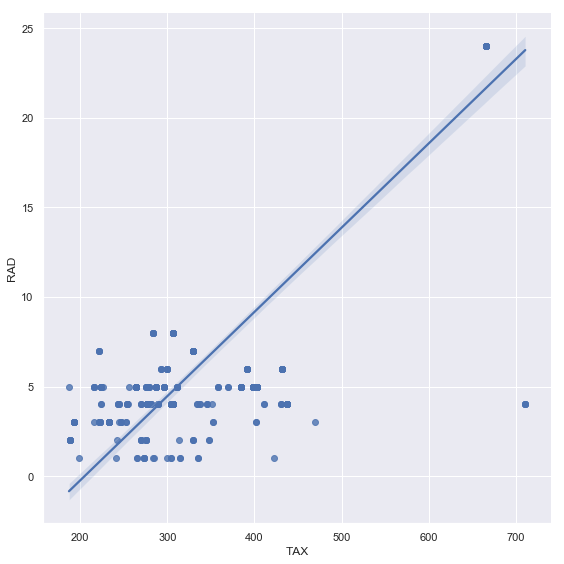

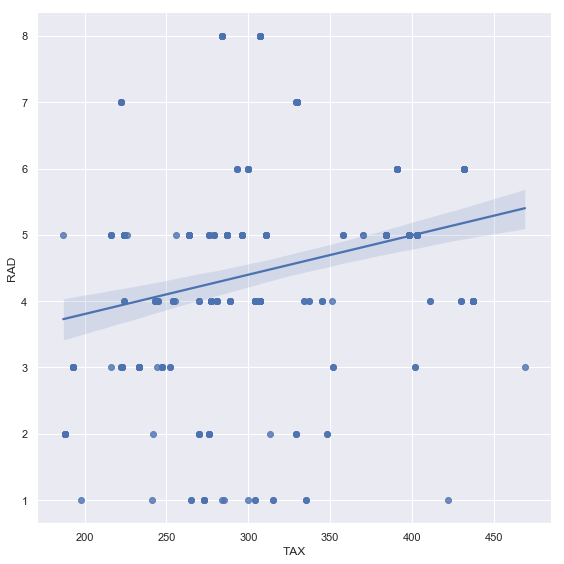

In [96]:
import seaborn as sns
sns.set()

# Plot sepal with as a function of sepal_length across days
sns.lmplot(x="TAX", y="RAD",truncate=True, height=8, data=data)
sns.lmplot(x="TAX", y="RAD",truncate=True, height=8, data=data[data['TAX'] < 600])



plt.show()

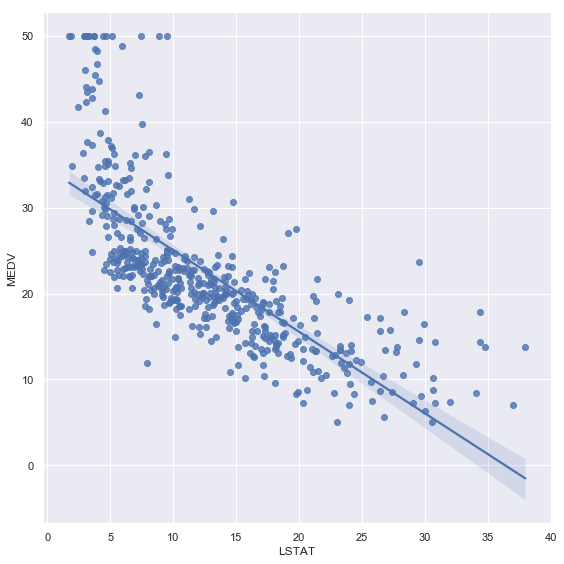

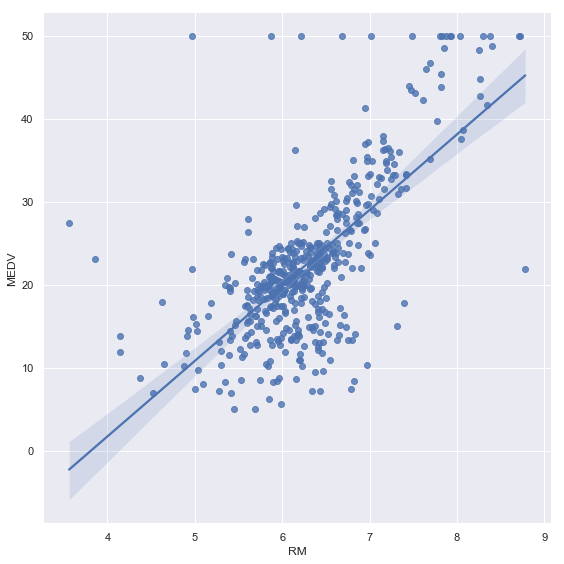

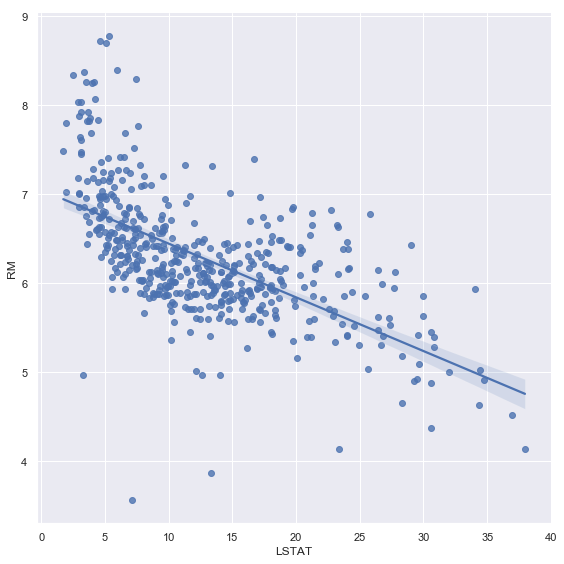

In [14]:
import seaborn as sns
sns.set()

# Plot sepal with as a function of sepal_length across days
sns.lmplot(x="LSTAT", y="MEDV",truncate=True, height=8, data=data)
sns.lmplot(x="RM", y="MEDV",truncate=True, height=8, data=data)
sns.lmplot(x="LSTAT", y="RM",truncate=True, height=8, data=data)


plt.show()

방의 개수에 따라서 집값은 상승하는 추세를 보이며 저소득층 주민비율이 높을수록 방의개수, 집값은 모두 떨어지는 경향을 보였다.

따라서 방의 개수와 저소득층 주민비율을 가지고 단순 회귀분석을 통한 예측을 하고자 함.

In [97]:
new_data=data[data['RM'] > 3].round()

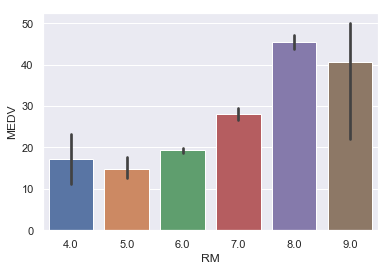

In [98]:
sns.barplot(x='RM', y='MEDV', data=new_data)

plt.show()

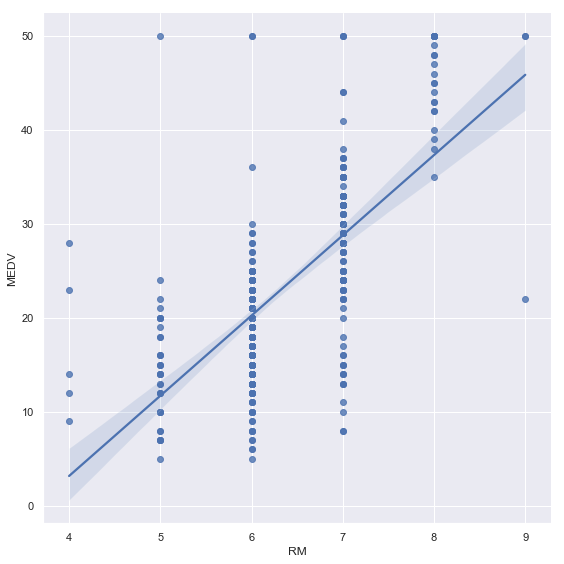

In [99]:
sns.lmplot(x="RM", y="MEDV",truncate=True, height=8, data=new_data)
plt.show()